#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [13]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

#### Normalization

In [14]:
train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

#### One-hot encoding

In [15]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [16]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [17]:
model.compile(
    optimizer=optimizers.Adam(), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

# model.compile(optimizer='adam', 
#               loss=losses.categorical_crossentropy, 
#               metrics=['accuracy'])

<br> 

#### 3. Train the model

In [18]:
# Training 과정에서 epoch마다 활용할 validation set을 나눠줄 수 있습니다.

history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15
480/480 [==============================] - 7s 10ms/step - loss: 0.2937 - categorical_accuracy: 0.9125 - val_loss: 0.1286 - val_categorical_accuracy: 0.9600
Epoch 2/15
480/480 [==============================] - 5s 10ms/step - loss: 0.1253 - categorical_accuracy: 0.9621 - val_loss: 0.0894 - val_categorical_accuracy: 0.9743
Epoch 3/15
480/480 [==============================] - 5s 10ms/step - loss: 0.0905 - categorical_accuracy: 0.9722 - val_loss: 0.0859 - val_categorical_accuracy: 0.9737
Epoch 4/15
480/480 [==============================] - 5s 10ms/step - loss: 0.0726 - categorical_accuracy: 0.9770 - val_loss: 0.0781 - val_categorical_accuracy: 0.9765
Epoch 5/15
480/480 [==============================] - 5s 10ms/step - loss: 0.0607 - categorical_accuracy: 0.9809 - val_loss: 0.0788 - val_categorical_accuracy: 0.9768
Epoch 6/15
480/480 [==============================] - 5s 10ms/step - loss: 0.0512 - categorical_accuracy: 0.9832 - val_loss: 0.0744 - val_categorical_accuracy: 0.977

<br> 

#### 4. Test the model

In [19]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 1s 5ms/step - loss: 0.0687 - categorical_accuracy: 0.9808
loss (cross-entropy) : 0.068677619099617
test accuracy : 0.9808000326156616


In [21]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [22]:
history.history['loss']

[0.2936698794364929,
 0.12533096969127655,
 0.09052203595638275,
 0.0725841224193573,
 0.06070784851908684,
 0.05124099180102348,
 0.04410504549741745,
 0.04026901349425316,
 0.03458770737051964,
 0.031059829518198967,
 0.028341932222247124,
 0.0288486760109663,
 0.025251813232898712,
 0.023563755676150322,
 0.020850148051977158]

<br> 

#### 5. Visualize the result

In [23]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [25]:
len(history.history['loss'])

15

In [29]:
import numpy as np

x_len = np.arange(15) # array of range
x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

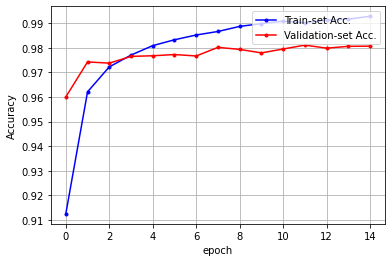

In [24]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()